In [1]:
import pandas as pd
from plotnine import *
import glob
from matplotlib import pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

In [2]:
def get_perf_diff(xdf):
    xdf["diff"] = xdf["time"]/xdf["time"].min()
    xdf["diff"] = xdf["diff"].map('{:,.1f}x'.format)
    return xdf
    
df = pd.read_csv("gitrepo/benchmarks/result/vldb/batch1/gpu4.8.csv")
df["time_s"] = df["time"] / 1000
df["stddev_s"] = df["stddev"]/1000
df = df.groupby("query", group_keys=False).apply(get_perf_diff)
df["engine"] = pd.Categorical(df["engine"], ordered=True, categories=reversed(df["engine"].unique()))
df["Query"] = pd.Categorical(df["query"], ordered=True, categories=["TT1","TT2","TT3","TT4","WM","BB"])
df.loc[:10, :]

,engine,dataset,query,time,stddev,results,warmup,repeat,time_s,stddev_s,diff,Query
0,gpjson,twitter_small_records.json,TT1,210.928501,1.887442,150135,5,10,0.210929,0.001887,1.0x,TT1
1,gpjson,twitter_small_records.json,TT2,214.185202,4.662049,150135,5,10,0.214185,0.004662,1.0x,TT2
2,gpjson,twitter_small_records.json,TT3,210.428816,2.681621,405,5,10,0.210429,0.002682,1.0x,TT3
3,gpjson,twitter_small_records.json,TT4,212.835845,2.584167,137559,5,10,0.212836,0.002584,1.0x,TT4
4,gpjson,walmart_small_records.json,WM,249.241585,3.683908,15892,5,10,0.249242,0.003684,1.0x,WM
5,gpjson,bestbuy_small_records.json,BB,265.979585,3.217386,459332,5,10,0.265980,0.003217,1.0x,BB
6,javajsonpath,twitter_small_records.json,TT1,756.100000,79.511634,150135,5,10,0.756100,0.079512,3.6x,TT1
7,javajsonpath,twitter_small_records.json,TT2,838.100000,44.450847,300270,5,10,0.838100,0.044451,3.9x,TT2
8,javajsonpath,twitter_small_records.json,TT3,679.100000,24.264515,405,5,10,0.679100,0.024265,3.2x,TT3
9,javajsonpath,twitter_small_records.json,TT4,709.600000,31.626993,137559,5,10,0.709600,0.031627,3.3x,TT4


/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 4.5 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: remade plots/query_perf.pdf


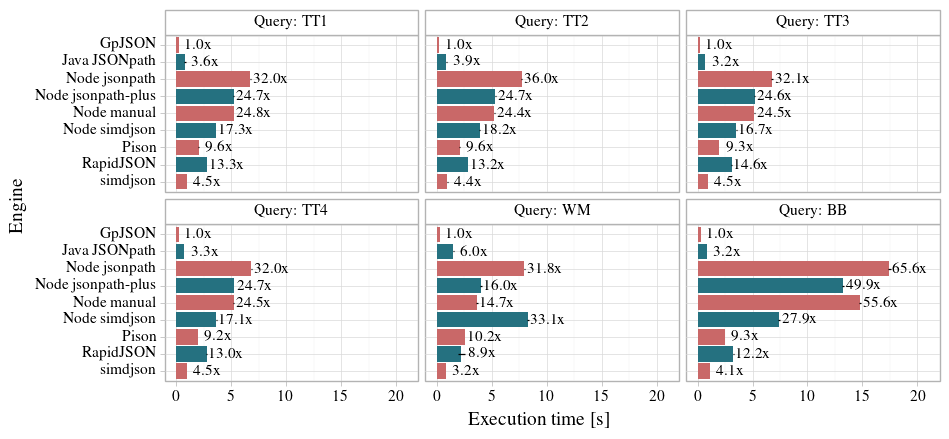

<ggplot: (730404013)>

In [329]:
orange = "#C96868"
blue = "#257180"
plt = (
    ggplot(df)
    + theme_light(base_size=14)
    + geom_bar(aes(x="engine", y="time_s", fill="engine"), stat=stat_identity)
    + geom_segment(aes(x="engine", xend="engine", y="time_s-stddev_s", yend="time_s+stddev_s"), stat=stat_identity, size=0.5)
    + geom_text(aes(x="engine", y="time_s+1.8", label="diff"))
    + scale_fill_manual([orange, blue] * 5)
    + scale_x_discrete(labels=list(reversed(["GpJSON", "Java JSONpath", "Node jsonpath", "Node jsonpath-plus", "Node manual", "Node simdjson",
                            "Pison", "RapidJSON", "simdjson"])))
    + scale_y_continuous(limits=[0, 21])
    + guides(fill=None)
    + facet_wrap("Query", labeller="label_both")
    + coord_flip()
    + xlab("Engine") + ylab("Execution time [s]")
    + theme(figure_size=(10,4.5), strip_background=element_rect(fill="white"), strip_text=element_text(color="black"),
           axis_text=element_text(color="black"))
)

plt.save("remade plots/query_perf.pdf")
plt

In [330]:
files = glob.glob("benchmarks/result/vldb/batch1/gpu*.csv")
df_list = []
for file in files:
    df = pd.read_csv(file)
    if not file.endswith("gpu4.8.csv"):
        df = df.loc[df["engine"] == "gpjson", :].reset_index(drop=True)
        df["engine"] = "gpjson_" + file.split("/")[-1].rsplit(".")[0]
    df_list.append(df)
all_df = pd.concat(df_list).reset_index(drop=True)
all_df = all_df.loc[all_df["query"] == "TT1", :].reset_index(drop=True)
all_df["time_s"] = all_df["time"] / 1000
all_df["stddev_s"] = all_df["stddev"]/1000
all_df = all_df.groupby("query", group_keys=False).apply(get_perf_diff)
all_df["engine"] = pd.Categorical(all_df["engine"], ordered=True, categories=[
    "simdjson", "rapidjson", "pison", "nodesimdjson", "nodemanual", "nodejsonpathplus", "nodejsonpath", "javajsonpath",
    "gpjson_gpu2", "gpjson_gpu3", "gpjson"
])
all_df

,engine,dataset,query,time,stddev,results,warmup,repeat,time_s,stddev_s,diff
0,gpjson,twitter_small_records.json,TT1,210.928501,1.887442,150135,5,10,0.210929,0.001887,1.0x
1,javajsonpath,twitter_small_records.json,TT1,756.100000,79.511634,150135,5,10,0.756100,0.079512,3.6x
2,nodejsonpath,twitter_small_records.json,TT1,6739.166543,46.201606,150135,5,10,6.739167,0.046202,32.0x
3,nodejsonpathplus,twitter_small_records.json,TT1,5219.598268,36.569677,150135,5,10,5.219598,0.036570,24.7x
4,nodemanual,twitter_small_records.json,TT1,5229.063484,15.627093,150135,5,10,5.229063,0.015627,24.8x
5,nodesimdjson,twitter_small_records.json,TT1,3639.986334,14.234192,150135,5,10,3.639986,0.014234,17.3x
6,pison,twitter_small_records.json,TT1,2028.200000,15.040700,150135,5,10,2.028200,0.015041,9.6x
7,rapidjson,twitter_small_records.json,TT1,2800.200000,6.976150,150135,5,10,2.800200,0.006976,13.3x
8,simdjson,twitter_small_records.json,TT1,948.700000,2.560380,150135,5,10,0.948700,0.002560,4.5x
9,gpjson_gpu2,twitter_small_records.json,TT1,471.159888,5.160528,150135,5,10,0.471160,0.005161,2.2x


/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4.5 x 2.4 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: remade plots/device_comparison.pdf


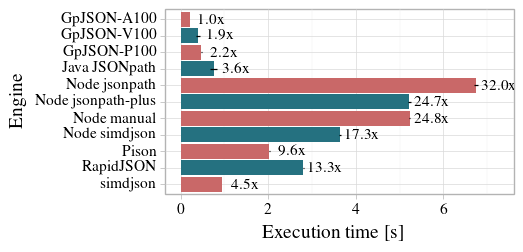

<ggplot: (717668885)>

In [331]:
orange = "#C96868"
blue = "#257180"
plt = (
    ggplot(all_df)
    + theme_light(base_size=14)
    + geom_bar(aes(x="engine", y="time_s", fill="engine"), stat=stat_identity)
    + geom_segment(aes(x="engine", xend="engine", y="time_s-stddev_s", yend="time_s+stddev_s"), stat=stat_identity, size=0.5)
    + geom_text(aes(x="engine", y="time_s+0.5", label="diff"))
    + scale_fill_manual([orange, blue] * 6)
    + scale_x_discrete(labels=list(reversed(["GpJSON-A100", "GpJSON-V100", "GpJSON-P100", "Java JSONpath", "Node jsonpath", "Node jsonpath-plus", "Node manual", "Node simdjson",
                            "Pison", "RapidJSON", "simdjson"])))
    # + scale_y_continuous(limits=[0, 21])
    + guides(fill=None)
    + coord_flip()
    + xlab("Engine") + ylab("Execution time [s]")
    + theme(figure_size=(4.5,2.4), strip_background=element_rect(fill="white"), strip_text=element_text(color="black"),
           axis_text=element_text(color="black"))
)

plt.save("remade plots/device_comparison.pdf")
plt

In [332]:
df = pd.read_csv("benchmarks/result/vldb/selectivity/gpu4.8.csv")
df["time_s"] = df["time"] / 1000
df["stddev_s"] = df["stddev"]/1000
df["engine"] = pd.Categorical(df["engine"], ordered=True, categories=reversed(df["engine"].unique()))
df["Selectivity"] = df["dataset"].str.split(".", n=1).str[0].str.split("[rg]",regex=True).str[-1] + " \%"
df["Selectivity"] = pd.Categorical(df["Selectivity"], ordered=True, categories=["0 \%", "25 \%", "50 \%", "75 \%", "100 \%"])
df["Edit"] = df["dataset"].str.split(".", n=1).str[0].str.split("[_0-9]",regex=True).str[3]
df = df.groupby(["Selectivity", "Edit"], group_keys=False).apply(get_perf_diff)
# df["Query"] = pd.Categorical(df["query"], ordered=True, categories=["TT1","TT2","TT3","TT4","WM","BB"])
df.loc[:10, :]

,engine,dataset,query,time,stddev,results,warmup,repeat,time_s,stddev_s,Selectivity,Edit,diff
0,gpjson,twitter_small_records_changeUserLang0.json,TT4,230.225309,32.864028,0,5,10,0.230225,0.032864,0 \%,changeUserLang,1.0x
1,gpjson,twitter_small_records_deleteUser0.json,TT4,179.488071,14.609108,0,5,10,0.179488,0.014609,0 \%,deleteUser,1.0x
2,gpjson,twitter_small_records_deleteUserLang0.json,TT4,234.373389,33.004019,0,5,10,0.234373,0.033004,0 \%,deleteUserLang,1.0x
3,gpjson,twitter_small_records_changeUserLang25.json,TT4,217.235199,2.900680,37640,5,10,0.217235,0.002901,25 \%,changeUserLang,1.0x
4,gpjson,twitter_small_records_deleteUser25.json,TT4,183.208253,2.592891,37674,5,10,0.183208,0.002593,25 \%,deleteUser,1.0x
5,gpjson,twitter_small_records_deleteUserLang25.json,TT4,218.474362,2.977443,37612,5,10,0.218474,0.002977,25 \%,deleteUserLang,1.0x
6,gpjson,twitter_small_records_changeUserLang50.json,TT4,217.219335,2.890949,75239,5,10,0.217219,0.002891,50 \%,changeUserLang,1.0x
7,gpjson,twitter_small_records_deleteUser50.json,TT4,195.394818,0.782406,74615,5,10,0.195395,0.000782,50 \%,deleteUser,1.0x
8,gpjson,twitter_small_records_deleteUserLang50.json,TT4,219.268740,3.144789,74729,5,10,0.219269,0.003145,50 \%,deleteUserLang,1.0x
9,gpjson,twitter_small_records_changeUserLang75.json,TT4,218.657138,3.357063,112552,5,10,0.218657,0.003357,75 \%,changeUserLang,1.0x


/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 6 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: remade plots/selectivity.pdf


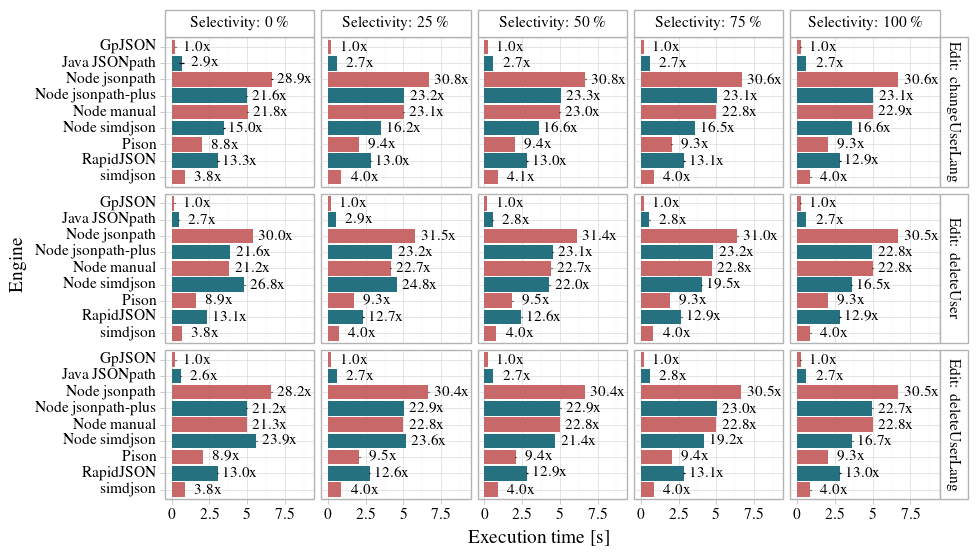

<ggplot: (730498953)>

In [333]:
orange = "#C96868"
blue = "#257180"
plt = (
    ggplot(df)
    + theme_light(base_size=14)
    + geom_bar(aes(x="engine", y="time_s", fill="engine"), stat=stat_identity)
    + geom_segment(aes(x="engine", xend="engine", y="time_s-stddev_s", yend="time_s+stddev_s"), stat=stat_identity, size=0.5)
    + geom_text(aes(x="engine", y="time_s+1.5", label="diff"))
    + scale_fill_manual([orange, blue] * 5)
    + scale_x_discrete(labels=list(reversed(["GpJSON", "Java JSONpath", "Node jsonpath", "Node jsonpath-plus", "Node manual", "Node simdjson",
                            "Pison", "RapidJSON", "simdjson"])))
    + scale_y_continuous(limits=[0, 9])
    + guides(fill=None)
    + facet_grid(["Edit", "Selectivity"], labeller="label_both")
    # + facet_grid("Selectivity")
    + coord_flip()
    + xlab("Engine") + ylab("Execution time [s]")
    + theme(figure_size=(10,6), strip_background=element_rect(fill="white"), strip_text=element_text(color="black"),
           axis_text=element_text(color="black"))
)

plt.save("remade plots/selectivity.pdf")
plt

In [334]:
files = glob.glob("benchmarks/result/vldb/sizes/gpu*.csv")
df_list = []
for file in files:
    df = pd.read_csv(file)
    if not file.endswith("gpu4.8.csv"):
        df = df.loc[df["engine"] == "gpjson", :].reset_index(drop=True)
        df["engine"] = "gpjson_" + file.split("/")[-1].rsplit(".")[0]
    df_list.append(df)
all_df = pd.concat(df_list).reset_index(drop=True)
all_df["time_s"] = all_df["time"] / 1000
all_df["stddev_s"] = all_df["stddev"]/1000
all_df["scale_factor"] = all_df["dataset"].str.rsplit("x", n=1).str[0].str.split("_",regex=True).str[3].fillna("1").astype(float)
all_df["Size"] = (all_df["scale_factor"] * 800).astype(int).map('{:,d}'.format) + " MB"
all_df = all_df.groupby("Size", group_keys=False).apply(get_perf_diff)
all_df["Size"] = pd.Categorical(all_df["Size"], ordered=True, categories=[
    "100 MB", "200 MB", "400 MB", "800 MB", "1,600 MB", "3,200 MB", "6,400 MB", "9,600 MB", "12,800 MB"
])
all_df["engine"] = pd.Categorical(all_df["engine"], ordered=True, categories=[
    "simdjson", "rapidjson", "pison", "nodesimdjson", "nodemanual", "nodejsonpathplus", "nodejsonpath", "javajsonpath",
    "gpjson_gpu2", "gpjson_gpu3", "gpjson"
])
all_df.loc[all_df["Size"] == "9,600 MB", :]

,engine,dataset,query,time,stddev,results,warmup,repeat,time_s,stddev_s,scale_factor,Size,diff
7,gpjson,twitter_small_records_12x.json,TT4,2596.878814,202.009631,1651013,5,10,2.596879,0.202010,12.0,"9,600 MB",1.0x
16,javajsonpath,twitter_small_records_12x.json,TT4,22296.000000,253.655935,1651016,5,10,22.296000,0.253656,12.0,"9,600 MB",8.6x
25,pison,twitter_small_records_12x.json,TT4,22879.700000,124.258000,355097,5,10,22.879700,0.124258,12.0,"9,600 MB",8.8x
34,rapidjson,twitter_small_records_12x.json,TT4,37956.100000,366.189000,1651016,5,10,37.956100,0.366189,12.0,"9,600 MB",14.6x
43,simdjson,twitter_small_records_12x.json,TT4,11090.400000,28.433200,1651016,5,10,11.090400,0.028433,12.0,"9,600 MB",4.3x
52,gpjson_gpu2,twitter_small_records_12x.json,TT4,5764.446242,313.679906,1651013,5,10,5.764446,0.313680,12.0,"9,600 MB",2.2x
61,gpjson_gpu3,twitter_small_records_12x.json,TT4,4635.508673,389.143681,1651013,5,10,4.635509,0.389144,12.0,"9,600 MB",1.8x


/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 6 in image.
/Users/sacheendra/miniconda3/envs/thesis/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: remade plots/dataset_sizes.pdf


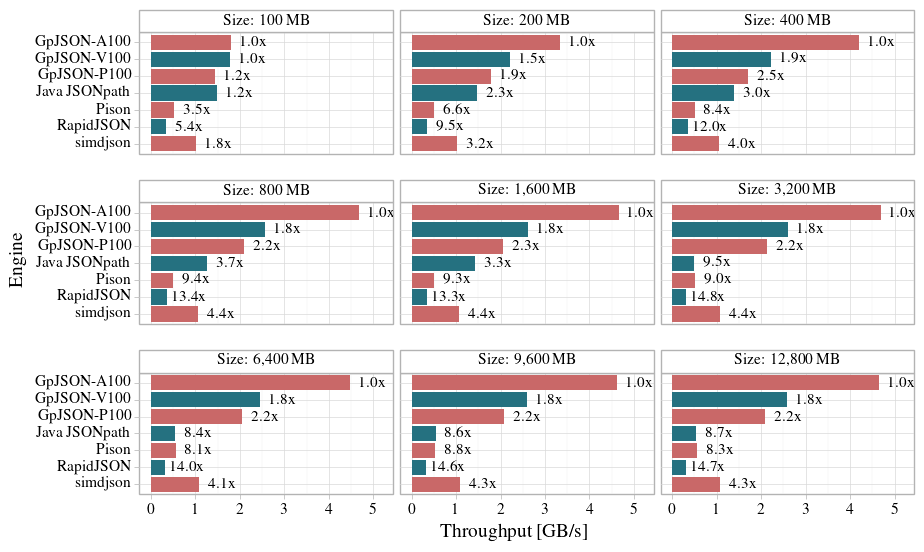

<ggplot: (729371757)>

In [335]:
orange = "#C96868"
blue = "#257180"
plt = (
    ggplot(all_df)
    + theme_light(base_size=14)
    + geom_bar(aes(x="engine", y="scale_factor/time_s", fill="engine"), stat=stat_identity)
    # + geom_segment(aes(x="engine", xend="engine", y="scale_factor/(time_s-stddev_s)", yend="scale_factor/(time_s+stddev_s)"), stat=stat_identity, size=0.5)
    + geom_text(aes(x="engine", y="(scale_factor/time_s) + 0.5", label="diff"))
    + scale_fill_manual([orange, blue] * 10)
    + scale_x_discrete(labels=list(reversed(["GpJSON-A100", "GpJSON-V100", "GpJSON-P100", "Java JSONpath",
                            "Pison", "RapidJSON", "simdjson"])))
    # + scale_y_continuous(limits=[0, 9])
    + guides(fill=None)
    + facet_wrap("Size", labeller="label_both")
    # + facet_grid("Selectivity")
    + coord_flip()
    + xlab("Engine") + ylab("Throughput [GB/s]")
    + theme(figure_size=(10,6), strip_background=element_rect(fill="white"), strip_text=element_text(color="black"),
           axis_text=element_text(color="black"), subplots_adjust={'hspace': 0.4})
)

plt.save("remade plots/dataset_sizes.pdf")
plt